In [2]:
import random,math,copy,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt


In [17]:
m=20  # Problem dimension (number of decision variables
Ap=0.1  # Awareness probability
fl=2   # Flight length (fl)
wf=0.8# wf is used to control the importance of classification accuracy and number of selected features.


In [18]:
#D19
df=pd.read_csv("/home/ds/Downloads/PSP-CLASSIFICATION-RMSD-5 (1).csv",dtype='category')
features=["Area","ED", "Energy", 'SS', "ResidueLength", "PairNumber"]
#cat_columns = ["_ID_EXAM", "IMAGE_NAME", "GENDER", "RIGH/LEFT-HANDED"]
#df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

d=6   # Flock (population) size
lt=6
y=df['RMSD']
x=df[df.columns[1:7]]


In [7]:
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

grd = GradientBoostingClassifier(n_estimators=200)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)



neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.predict(x_test)
nacc=neigh.score(x_test,y_test)

rforest = RandomForestClassifier(n_estimators=500)
rforest.fit(x_train, y_train)
rforest.predict(x_test)
rfacc=rforest.score(x_test,y_test)

dtree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20)
dtree.fit(x_train, y_train)
dtree.predict(x_test)
dtacc=dtree.score(x_test,y_test)

print (nacc, rfacc, dtacc)

model=RandomForestClassifier()
model.fit(x_train,y_train)
im=(model.feature_importances_)
im

0.557128745473 0.712709911096 0.624135660191


array([ 0.16175686,  0.20510577,  0.26249662,  0.15211263,  0.11137815,
        0.10714997])

In [19]:
imo=pd.Series()
for i in range(d):
    imo= imo.set_value(features[i],im[i])

In [20]:
def init():   #initialization function
    df2=pd.DataFrame(np.ones((m,d),dtype='int'),columns=features)
    return df2
df2=init()

In [21]:
# this defines the fitness of each crow by calculating their accuracy and no features selected using the below formula
def fitness(df2):      # fitness function whose 1 parameter takes the crows and their position as input
    fnt=np.zeros((m,1))  # fnt is the fitness function
    for k in range(m):    
        global sel
        sel=[]
        q=0
        imp=0
        a=(df2.iloc[k,:])==0.0
        if a.all()==True:
            df2.iloc[k,:]=1.0
        for p in list(features):
            if df2.loc[k,p]==1.0:
                sel.insert(q,p)
                temp=imo[p]
                imp=imp+temp
            q=q+1
        lf=len(sel)
        divide=lf/lt
        fnt[k]=imp+wf*(1-float(lf/lt))     # fitness formula
    return fnt


In [22]:
# this function generates a number using the formula which loops over a randm number between 0 and 1000(both inclusive)
"""def chaotic(pq_old,c):      # the chaotic function which use sine map 
    for chaos in range(random.randint(0,1001)):
        pq_new = (c/4)*(math.sin(math.pi*pq_old))
        pq_old=pq_new
        global new 
        new=pq_new
    return new"""

'def chaotic(pq_old,c):      # the chaotic function which use sine map \n    for chaos in range(random.randint(0,1001)):\n        pq_new = (c/4)*(math.sin(math.pi*pq_old))\n        pq_old=pq_new\n        global new \n        new=pq_new\n    return new'

In [23]:
z=init()   #crow memory with initial position
tmax=50   # Maximum number of iterations (itermax)
xn=pd.DataFrame(z)  # the position of the crow
mem=init()  # memory is initialized using the init function
xnew=pd.DataFrame(xn)   # the positions of the crow
ft=fitness(xn)
plotit=[]

In [ ]:
tottime=0
s=pd.DataFrame(z)       # it is a formula to convert positions of each crow into 0 and 1 
for t in range(tmax):   # no of iterations
    time1=time.time()
    plotit.insert(t,ft.max())
    num = random.randint(0,m-1)   # Generation of random candidate crows for following (chasing)
    for i in range(m):   
        r=random.random()
        if r>=Ap:
            xnew.loc[i,:]= xn.loc[i,:]+fl*r*(mem.loc[num,:]-xn.loc[i,:]);# Generation of a new position for crow i (state 1)
        else:
            xnew.loc[i,:]=xnew.loc[i,:].apply(lambda lam:random.random())   # Generation of a new position for crow i (state 2)
    xnew= 1/( 1 + np.expm1(( 10*(xnew-0.5 ) ) ))    #  formula to convert positions of each crow into 0 and 1
    xnew=xnew.apply(lambda l:l>=random.random()).astype(int)

    xn=pd.DataFrame(xnew)          # it is the updated binary position of each crow
    #feasibility test
    # this is done so that to check if atleast one position of the crow has value equal to 1. if it is not true then every
    # position value of the crow is made 1.
    for i in range(m):
        a=(xn.loc[i,:])==0.0
        if a.all()==True:
            xn.loc[i,:]=1.0
    ft_new=fitness(xn)
    
    for i in range(m):
        
        if ft_new[i]>ft[i]:
            ft[i]=ft_new[i]
            for j in list(features):
                mem.loc[i,j]=xn.loc[i,j]
    time2=time.time()
    tottime=tottime+(time2-time1)
print(tottime/50)


0.11000626564025878


In [ ]:
# here the accuracy of each crows are calculated.
nacc1=np.zeros((m,1),dtype='float64')
rfacc1=np.zeros((m,1),dtype='float64')
dtacc1=np.zeros((m,1),dtype='float64')

q=0
for i in range(m):
    print(i)
    select=[]
    for p in list(features):
        if mem.loc[i,p]==1:
            select.insert(q,p)
            q=q+1
    neigh.fit(x_train[select], y_train)
    neigh.predict(x_test[select])
    nacc1[i]=neigh.score(x_test[select],y_test) 
    
    rforest.fit(x_train[select], y_train)
    rforest.predict(x_test[select])
    rfacc1[i]=rforest.score(x_test[select],y_test) 

    dtree.fit(x_train[select], y_train)
    dtree.predict(x_test[select])
    dtacc1[i]=dtree.score(x_test[select],y_test)

print (nacc1.max(), rfacc1.max(), dtacc1.max()) # the crow with maximum accuracy is printed

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [ ]:
print ((mem.loc[nacc1.argmax(),:]==1.0).sum())
print ((mem.loc[rfacc1.argmax(),:]==1.0).sum())
print ((mem.loc[dtacc1.argmax(),:]==1.0).sum())

In [16]:
mem.loc[dtacc1.argmax(),:]

Area             0.0
ED               1.0
Energy           1.0
SS               0.0
ResidueLength    0.0
PairNumber       1.0
Name: 14, dtype: float64

In [23]:
nacc1

array([[ 0.73913043],
       [ 1.        ],
       [ 0.73913043],
       [ 0.73913043],
       [ 0.77173913],
       [ 0.83695652],
       [ 0.77173913],
       [ 0.82608696],
       [ 1.        ],
       [ 0.73913043],
       [ 1.        ],
       [ 0.77173913],
       [ 1.        ],
       [ 0.80434783],
       [ 1.        ],
       [ 0.79347826],
       [ 0.73913043],
       [ 0.77173913],
       [ 0.73913043],
       [ 0.76086957],
       [ 0.82608696],
       [ 0.73913043],
       [ 0.76086957],
       [ 0.77173913],
       [ 0.94565217],
       [ 1.        ],
       [ 0.79347826],
       [ 0.73913043],
       [ 0.77173913],
       [ 0.73913043]])

In [24]:
dtacc1

array([[ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 0.97826087],
       [ 1.        ],
       [ 0.98913043],
       [ 0.97826087],
       [ 1.        ],
       [ 1.        ],
       [ 0.98913043],
       [ 1.        ],
       [ 1.        ],
       [ 0.98913043],
       [ 1.        ],
       [ 1.        ],
       [ 0.98913043],
       [ 1.        ],
       [ 0.98913043],
       [ 0.98913043],
       [ 0.98913043],
       [ 0.98913043],
       [ 1.        ],
       [ 0.94565217],
       [ 1.        ],
       [ 1.        ],
       [ 0.98913043],
       [ 0.98913043],
       [ 1.        ]])

In [25]:
nacc1.argmax()

1

In [26]:
df

,CLASS_TYPE,_ID_EXAM,IMAGE_NAME,ID_PATIENT,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,1,88,80,1,0,0,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,1,88,81,1,0,0,28,2751.015869,6263.803711,44059.59766,0,22.056967,212.937836,0.009198,939.975647,0.184438
2,1,88,82,1,0,0,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0,997.580139,0.181287
3,1,88,83,1,0,0,28,2594.598877,6989.15918,54217.63281,0,30.559263,233.222504,0.367697,2060.858887,0.193084
4,1,90,84,2,1,1,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642
5,1,90,85,2,1,1,37,2933.900146,5204.903809,26191.06836,0.000166,21.112326,137.279755,0.050269,725.923706,0.207493
6,1,90,86,2,1,1,37,4456.074707,6598.502441,35429.26172,0,22.132128,215.025162,0,933.804993,0.156069
7,1,90,87,2,1,1,37,5208.846191,8485.979492,63556.20313,0.000018,49.318985,218.141678,0.081122,3109.769043,0.187861
8,1,91,88,3,0,1,65,3049.176025,7077.882324,35278.22656,0.000129,22.467434,210.90799,0.166431,861.382141,0.232558
9,1,91,89,3,0,1,65,3698.351562,6328.030273,30533.96289,0,20.745165,210.185883,0.184764,801.255493,0.138728


In [27]:
plotse=pd.Series(plotit)
print(plotit)

[1.0, 1.0, 1.2818730384559625, 1.2818730384559625, 1.2818730384559625, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.2899979070321188, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374, 1.3753850157635374]


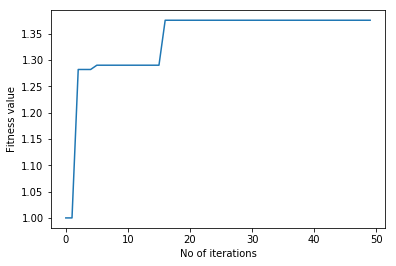

In [28]:
plt.plot(plotse)
plt.xlabel('No of iterations')
plt.ylabel('Fitness value')
plt.show()
